In this assignment students will build the random forest model after normalizing the
variable to house pricing from boston data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [2]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#Regression Problem 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0)
rf.fit(features, targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [4]:
target_predicted = rf.predict(features)

In [5]:
target_predicted[0]

25.75449999999999

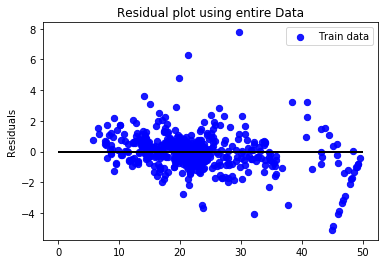

In [7]:
import matplotlib.pyplot as plt
# Now lets visualize the difference between predicted and original data with a horizontal line at 0
# Plots on the Line 0 means the value predicted and original data are matching
%matplotlib inline
plt.scatter(target_predicted,target_predicted- targets,c="b",s=40,alpha=0.9, label = 'Train data')
#plt.scatter(pred_test,pred_test- Y_test,c="r",s=40,alpha=0.9,  label = 'Test data')
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')

# Y label
plt.ylabel("Residuals")

## plot title
plt.title("Residual plot using entire Data")

plt.show()

In [9]:
# Lets Split the data for Training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features,targets,test_size=0.3, random_state=5)

In [10]:
rf = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [12]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

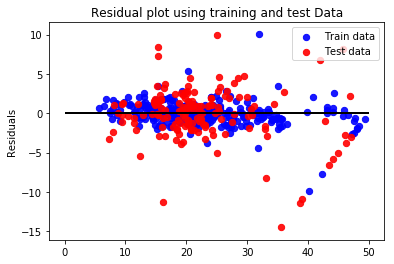

In [14]:
plt.scatter(pred_train,pred_train- Y_train,c="b",s=40,alpha=0.9, label = 'Train data')
plt.scatter(pred_test,pred_test- Y_test,c="r",s=40,alpha=0.9,  label = 'Test data')
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')

# Y label
plt.ylabel("Residuals")

## plot title
plt.title("Residual plot using training and test Data")

plt.show()